Why is this binary classification? 왜 이진분류일까? 
-> It classifies whether one has disbetes or not. 당뇨가 있냐 없냐 두가지로 분류되기 때문에 이진분류 문제임. 

In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv("./data/pima-indians-diabetes3.csv")
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
## 처음 5줄 보기
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## 마지막 3줄 보기
df.tail(3)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
## 정상과 당뇨 환자가 각각 몇명? 
#정상: diabetes = 0 / 당뇨: diabetes = 1

df['diabetes'].value_counts()  # df['diabetes'] 처럼 한줄만 지정할 

diabetes
0    500
1    268
Name: count, dtype: int64

In [7]:
## 각 속성(필드)의 통계적 데이터 : mean,std, min, max, percentile 등등
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
## 각 항목간의 상관관계 correlation
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

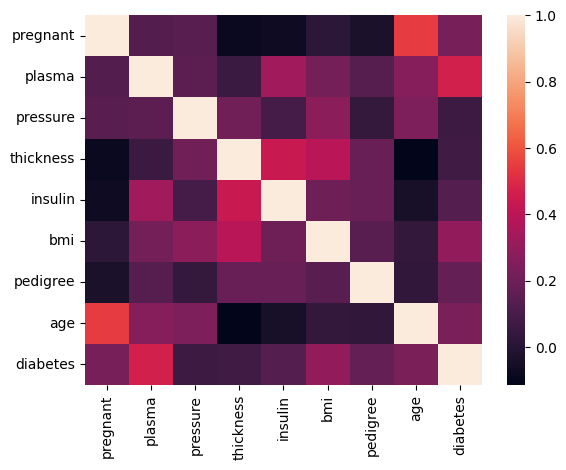

In [9]:
## 데이터간의 상관관계를 시각화

sns.heatmap(df.corr())

<Axes: >

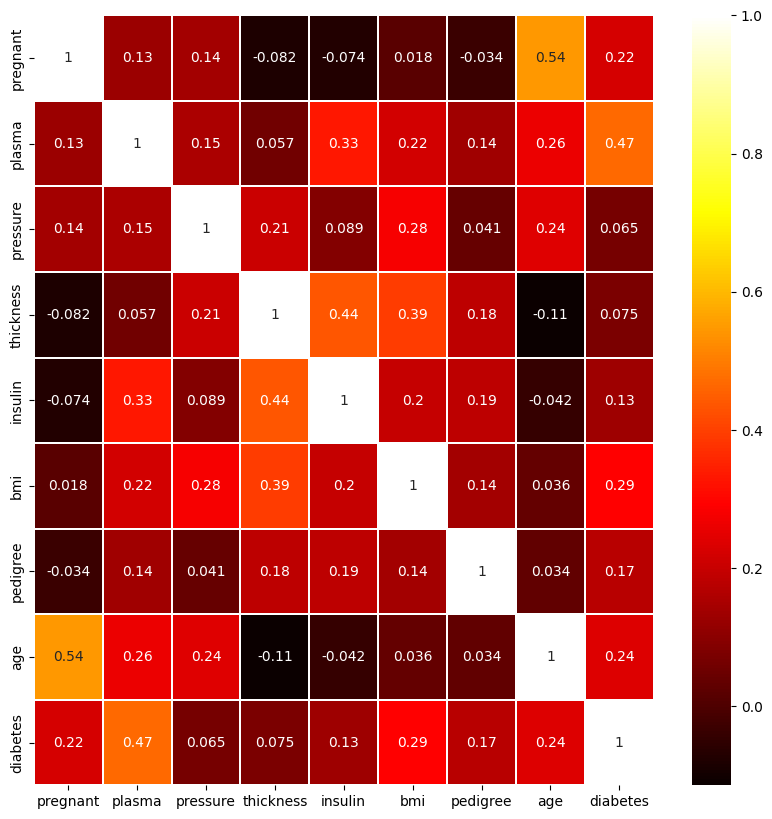

In [16]:
## heatmap 업그레이드
import matplotlib.pyplot as plt


plt.figure(figsize = (10,10))  # figsize: 그림판의 크기 12, 12 inch @ 100dpi 기준
#sns.heatmap(df.corr())

# 그림 사이사이 line을 긋고 싶다면?
sns.heatmap(df.corr(), cmap=plt.cm.hot, linewidths=0.1, linecolor='white', annot=True) #annot: 칸 안에 숫자가 써지는것

In [ ]:
## color map으로 위의 색상을 다른 색으로 변경 가능. 
#sns.heatmap(df.corr(), cmap=plt.cm.hot, linewidths=0.1, linecolor='white', annot=True)
# https://matplotlib.org/stable/users/explain/colors/colormaps.html 에서 선택 가

In [22]:
## 중요 데이터 추출하기 -  당뇨가 있는 사람의 plasma 값만 추출
df.plasma[df.diabetes ==1]

0      148
2      183
4      137
6       78
8      197
      ... 
755    128
757    123
759    190
761    170
766    126
Name: plasma, Length: 268, dtype: int64

In [23]:
## 중요 데이터 추출하기 -  당뇨가 없는 사람의 plasma 값만 추출
df.plasma[df.diabetes ==0]

1       85
3       89
5      116
7      115
10     110
      ... 
762     89
763    101
764    122
765    121
767     93
Name: plasma, Length: 500, dtype: int64

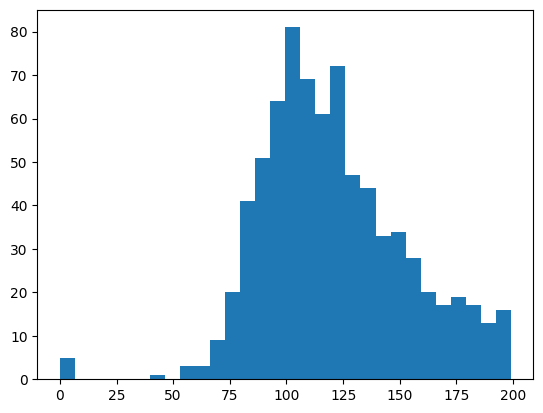

In [25]:
plt.hist(x = df.plasma, bins=30) # 30 구간으로 나누어 plasma 분포 시각화
plt.show()

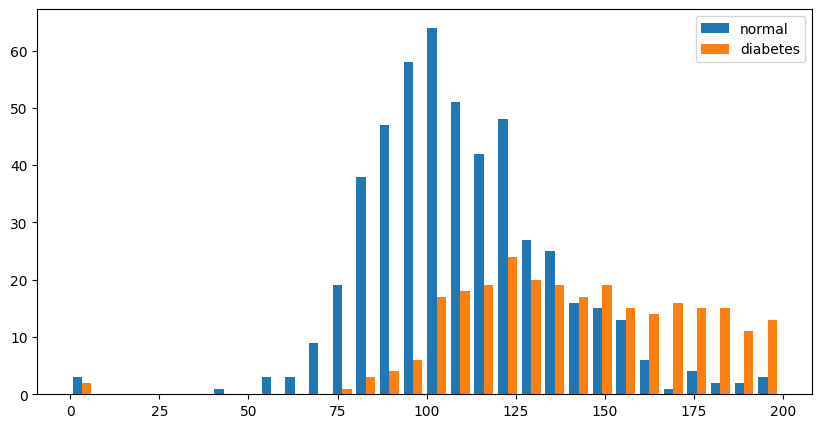

In [34]:
## 당뇨가 있는 사람과 없는 사람을 구분하여 plasma 분포를 히스토그램으로 그리기
plt.figure(figsize=(10,5))
plt.hist(x = [df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]], bins = 30,
        label = ['normal', 'diabetes'])
plt.legend()
plt.show()

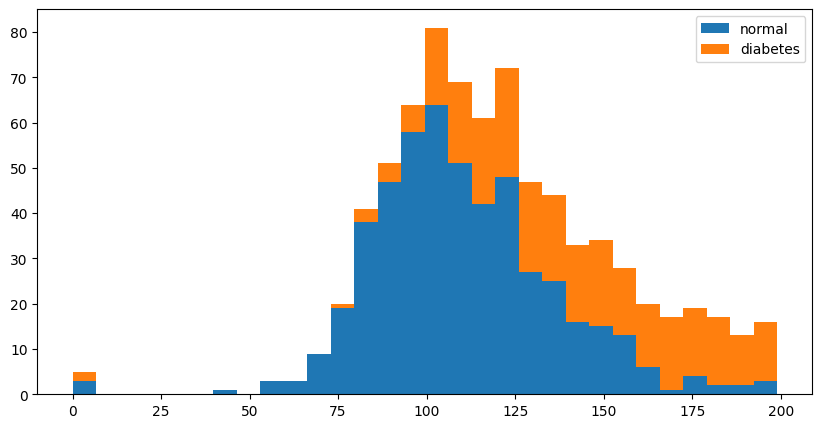

In [35]:
## 한단계 더 업그레이드
plt.figure(figsize=(10,5))
plt.hist(x = [df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]], bins = 30,
        label = ['normal', 'diabetes'], histtype='barstacked') # 막대 쌓기
plt.legend()
plt.show()

# 말 그대로 쌓인 것.

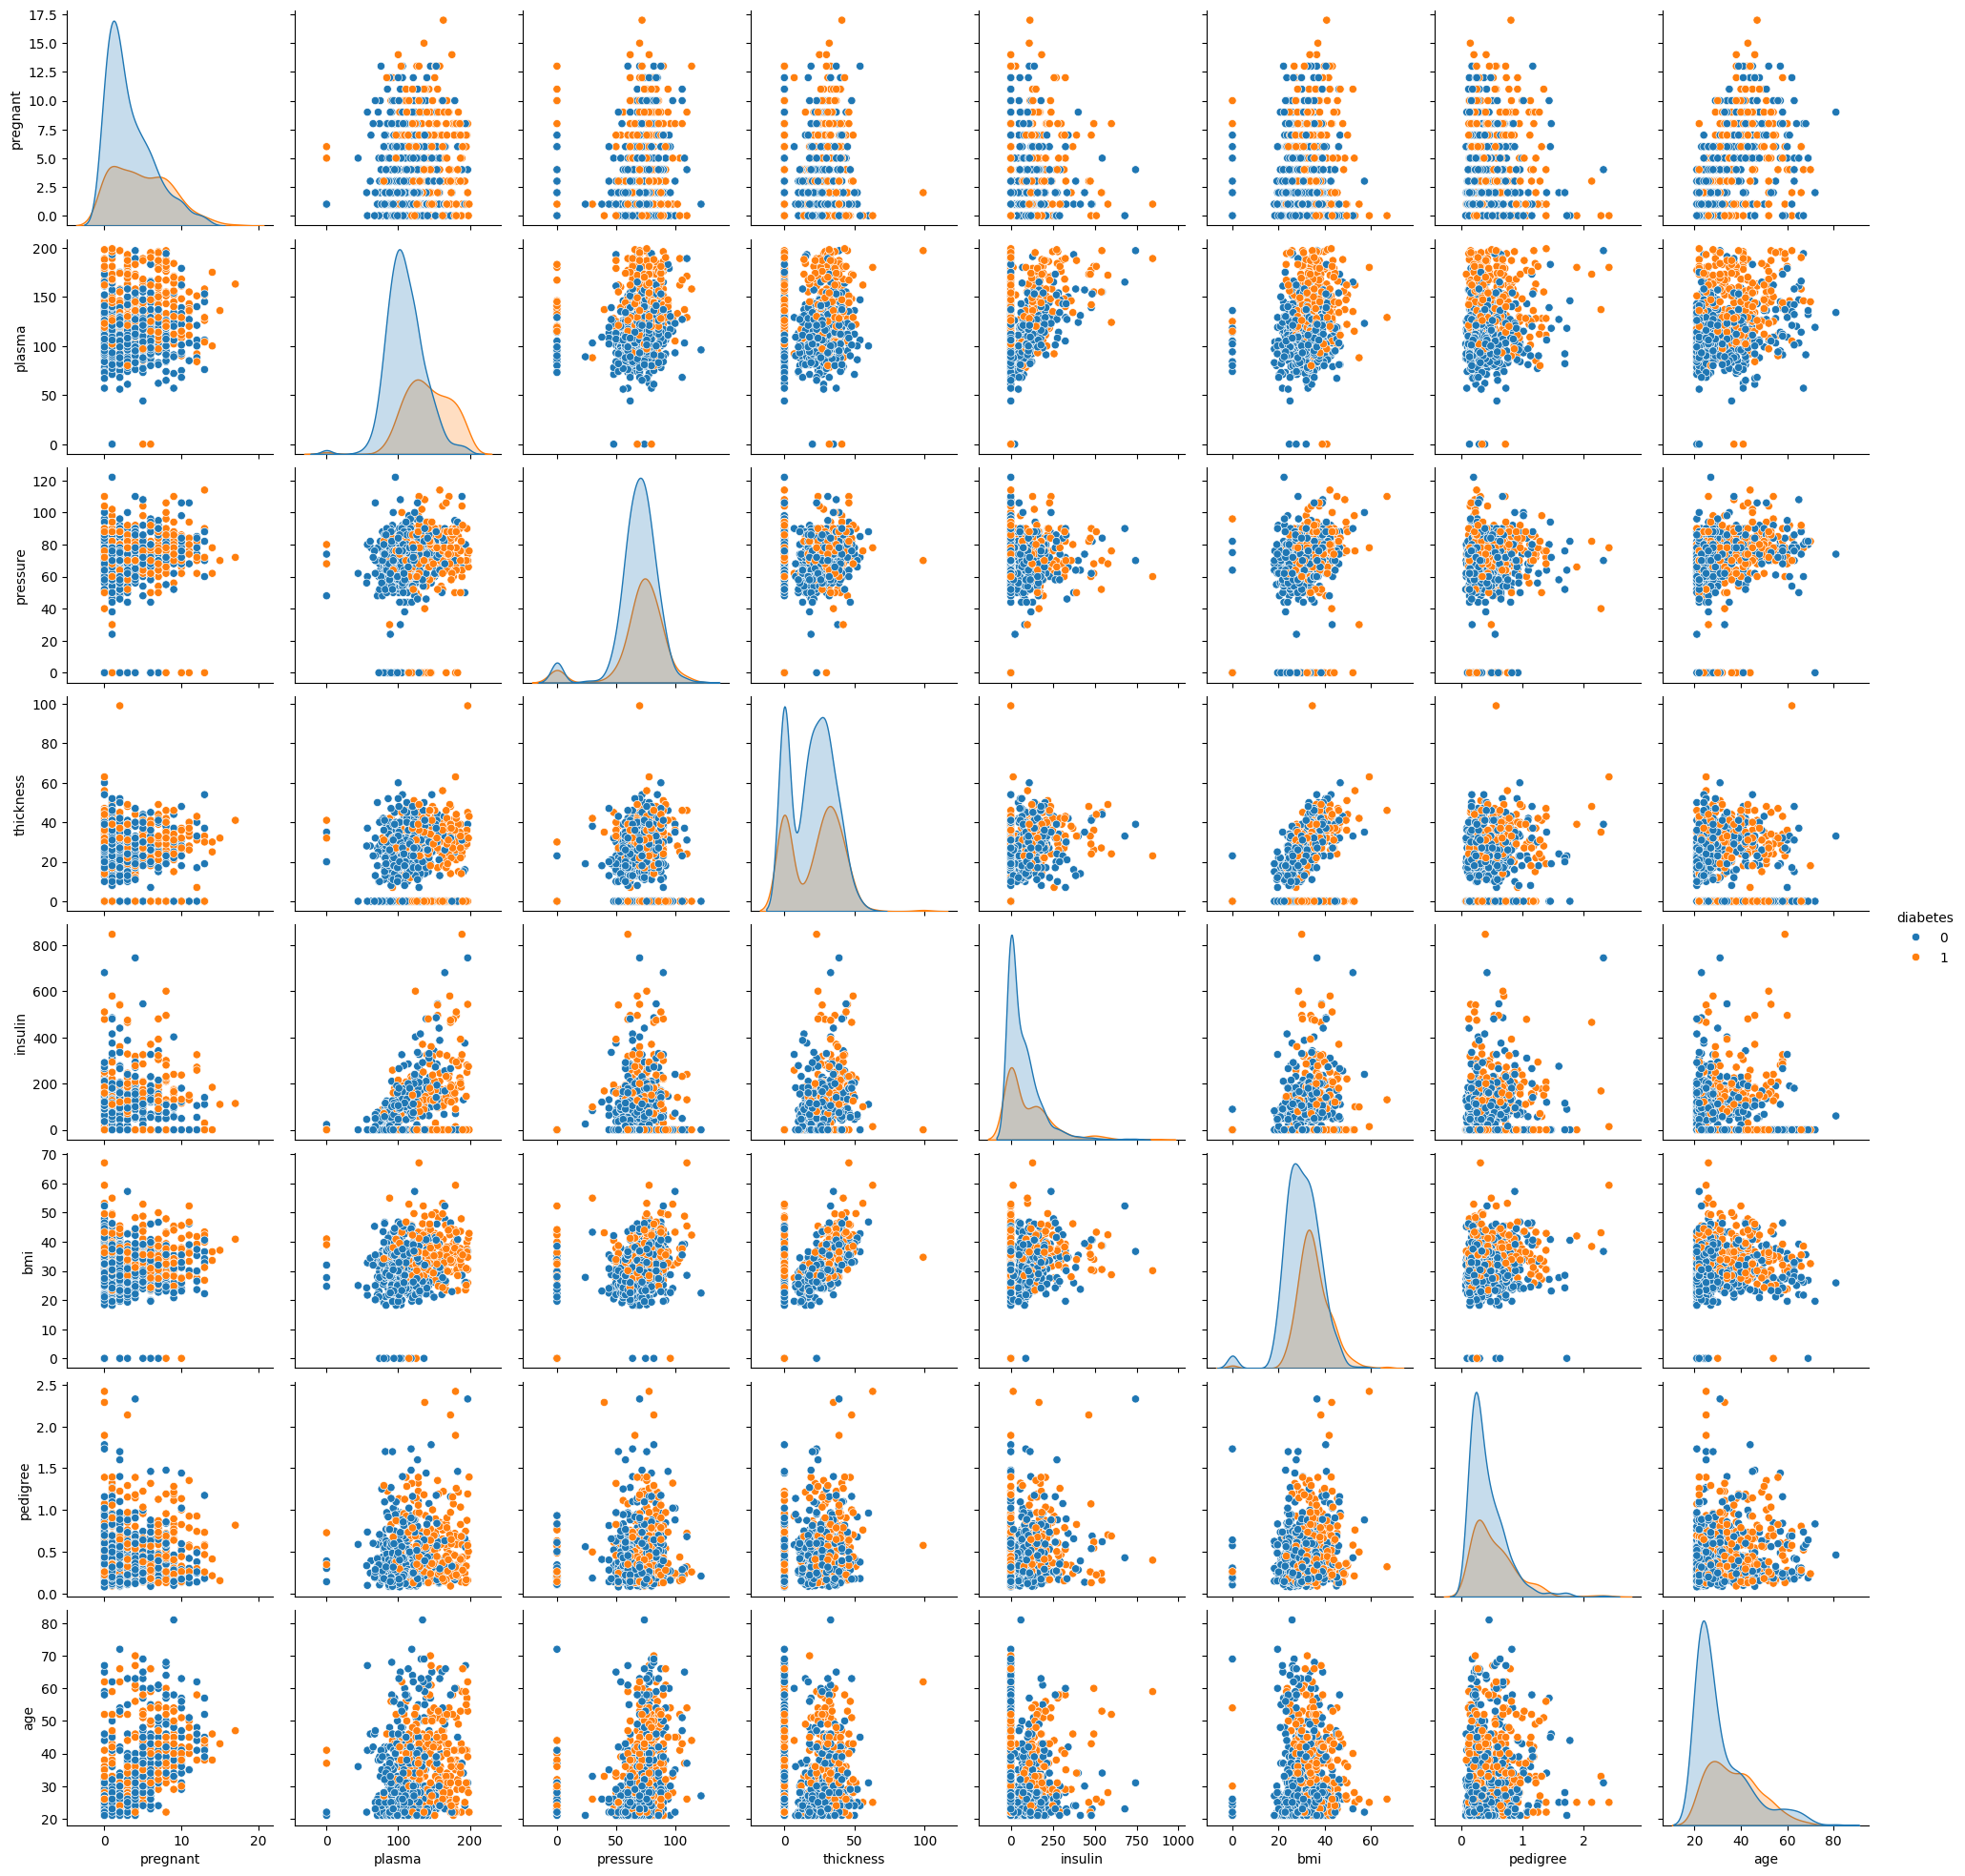

In [36]:
## pair plot 쌍으로 plot해보는것...? hue : 채도
sns.pairplot(df, hue='diabetes')
plt.show()

피마인디언 당뇨병 예측 (딥러닝: Deep Learning)

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense  # layers 층, Dense: 층 쌓는것
import pandas as pd

# 데이터 읽기
df = pd.read_csv("./data/pima-indians-diabetes3.csv")
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
## x 데이터와 y 데이터 분리
x = df.iloc[:, :-1] 
y = df.iloc[:,-1]  # diabetes만 y 데이터

In [53]:
x

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [45]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [46]:
## 학습 모델 설계
model = Sequential()
model.add( Dense(12, input_dim=8, activation='relu') )
model.add( Dense(8, activation = 'relu') )
model.add( Dense(1, activation='sigmoid') )
# 12, 8, 1 은 임의의 숫자.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
## 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 모델을 실행합니다.
history = model.fit(X,y, epochs=100, batch_size=10)

Epoch 1/100
77/77 [==============================] - 2s 3ms/step - loss: 8.0838 - accuracy: 0.3581
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 1.3949 - accuracy: 0.5404
Epoch 3/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.5938
Epoch 4/100
77/77 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.6159
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6172
Epoch 6/100
77/77 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.6289
Epoch 7/100
77/77 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6211
Epoch 8/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6641 - accuracy: 0.6445
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.6458
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6536
Epoch 11/

<Axes: >

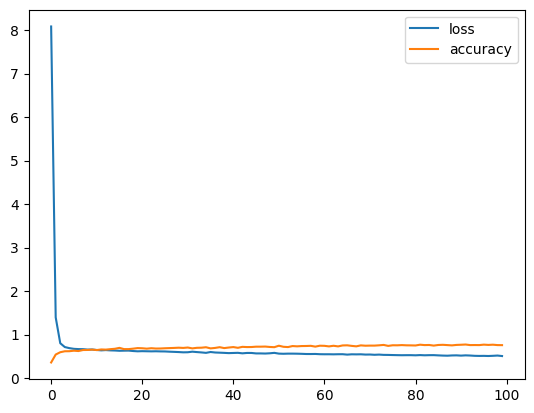

In [55]:
df_history = pd.DataFrame(history.history)
df_history.plot()